# **Unified Mentors Project-1 Analyzing Amazon Sales Data**


## **Domain:- E-Commerce**

### **Author:- Gowtham Vinayagamurthy**

### **IDE:- Jupyter Notebook**

### **Problem Statement & Objectives**
Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits. Sales management today is the most important function in a commercial and business enterprise.
The Objectives for this project are:- <br>
1. Do ETL (Extract-Transform-Load) some Amazon sales dataset <br>
2. Find Sales trends month-wise, year-wise, yearly month-wise. <br>
3. Find key metrics and factors and show the meaningful relationships between attributes. <br>
4. Conduct independent research and present the relevent findings. <br>

#### **Exploratory Data Analysis (EDA)**
Exploratory Data Analysis (EDA) in the context of retail, using the 'SampleSuperstore' dataset, involves examining and understanding the data to uncover patterns, trends, and insights that can inform business decisions. This process provides valuable insights into the retail business's performance and customer behavior, ultimately leading to informed decision-making and strategic planning.

#### **ETL (Extract, Transform, Load)**
ETL (Extract, Transform, Load) is a three-step process in computing used to manage data from various sources. The process begins with extracting data from one or more input sources, followed by transforming the data (including cleaning and formatting), and finally loading it into an output data container. ETL can be performed manually or through software applications that automate the process. Properly designed ETL systems ensure that the data meets specific standards and is ready for further use, such as in application development or decision-making. ETL is commonly used in data warehousing, where it integrates data from multiple systems, often managed by different stakeholders. The process involves extracting data, transforming it for storage and analysis, and loading it into a final database, such as a data warehouse, data lake, or data mart.

In [61]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv("Amazon Sales data.csv")
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [63]:
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [64]:
df.tail(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2/10/2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [66]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [67]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [68]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

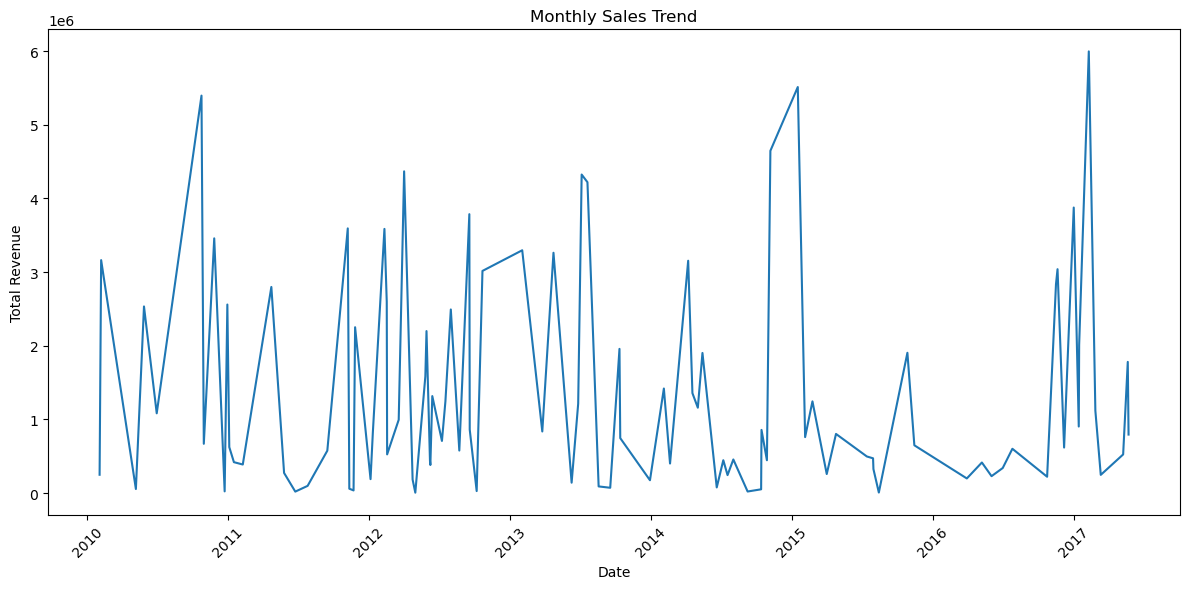

In [69]:
# Monthly Sales Trend
plt.figure(figsize=(12, 6))
monthly_sales = df.groupby('Order Date')['Total Revenue'].sum().reset_index()
plt.plot(monthly_sales['Order Date'], monthly_sales['Total Revenue'])
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

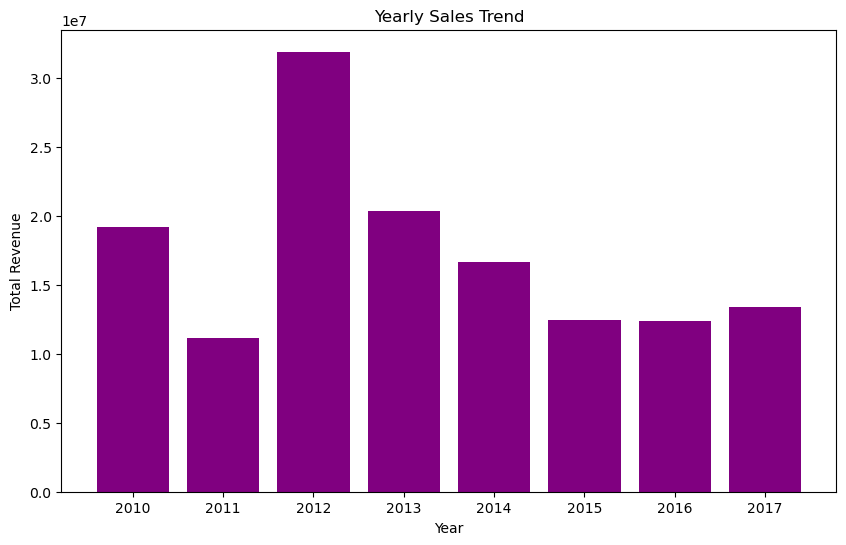

In [70]:
# Yearly Sales Trend
plt.figure(figsize=(10, 6))
color = ['purple']
yearly_sales = df.groupby('Year')['Total Revenue'].sum().reset_index()
plt.bar(yearly_sales['Year'], yearly_sales['Total Revenue'], color=color)
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

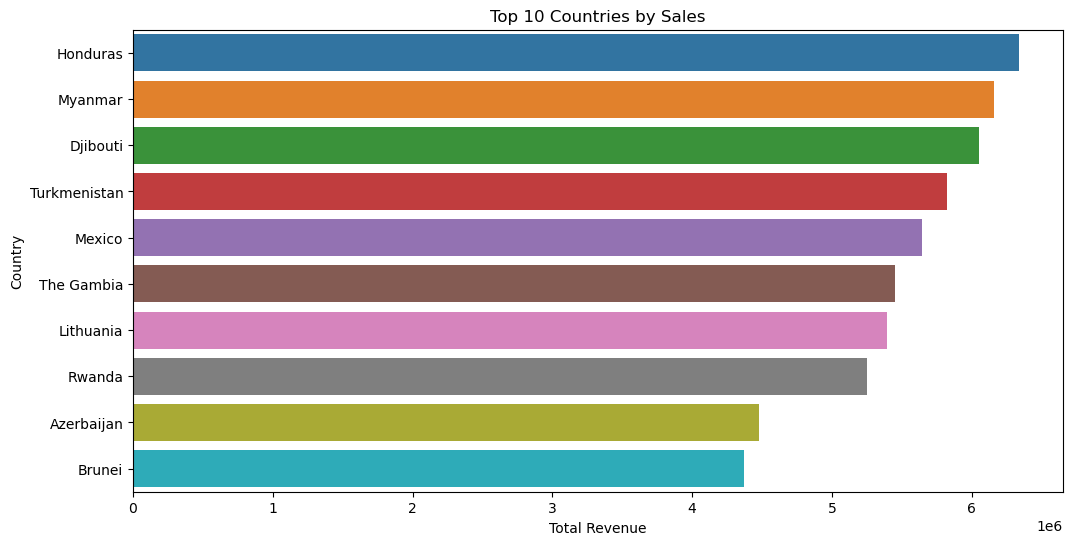

In [71]:
# Top 10 Countries by Sales
plt.figure(figsize=(12, 6))
top_countries = df.groupby('Country')['Total Revenue'].sum().nlargest(10).reset_index()
sns.barplot(x='Total Revenue', y='Country', data=top_countries)
plt.title('Top 10 Countries by Sales')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()

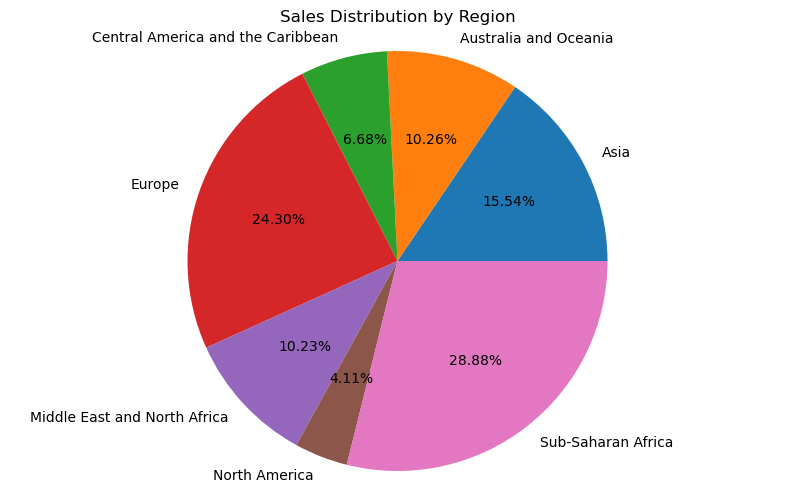

In [72]:
# Sales Distribution by Region
plt.figure(figsize=(10, 6))
region_sales = df.groupby('Region')['Total Revenue'].sum().reset_index()
plt.pie(region_sales['Total Revenue'], labels=region_sales['Region'], autopct='%1.2f%%')
plt.title('Sales Distribution by Region')
plt.axis('equal')
plt.show()

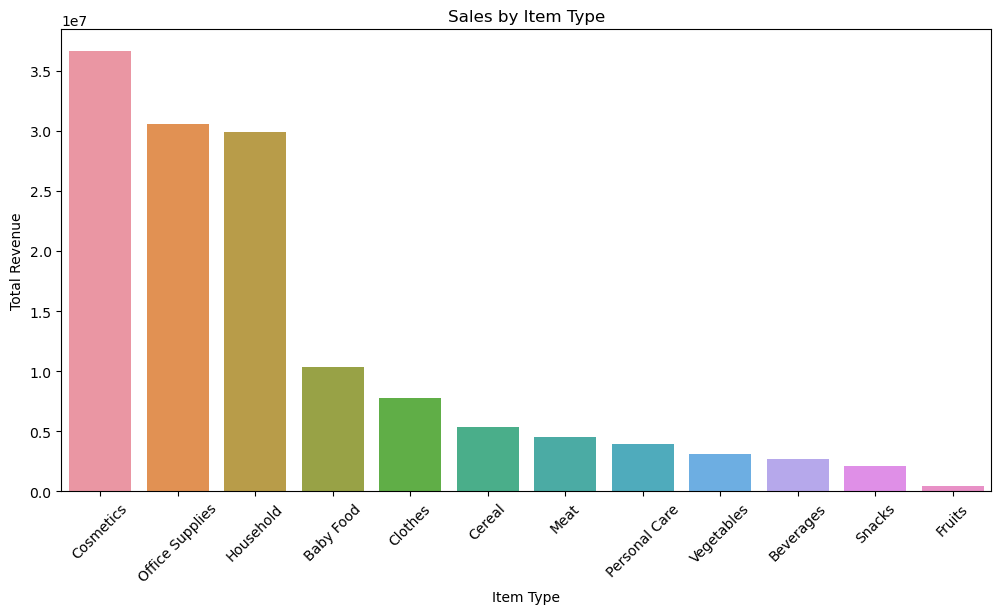

In [73]:
# Sales by Item Type 
plt.figure(figsize = (12, 6))
item_type_sales = df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Item Type', y='Total Revenue', data=item_type_sales)
plt.title('Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

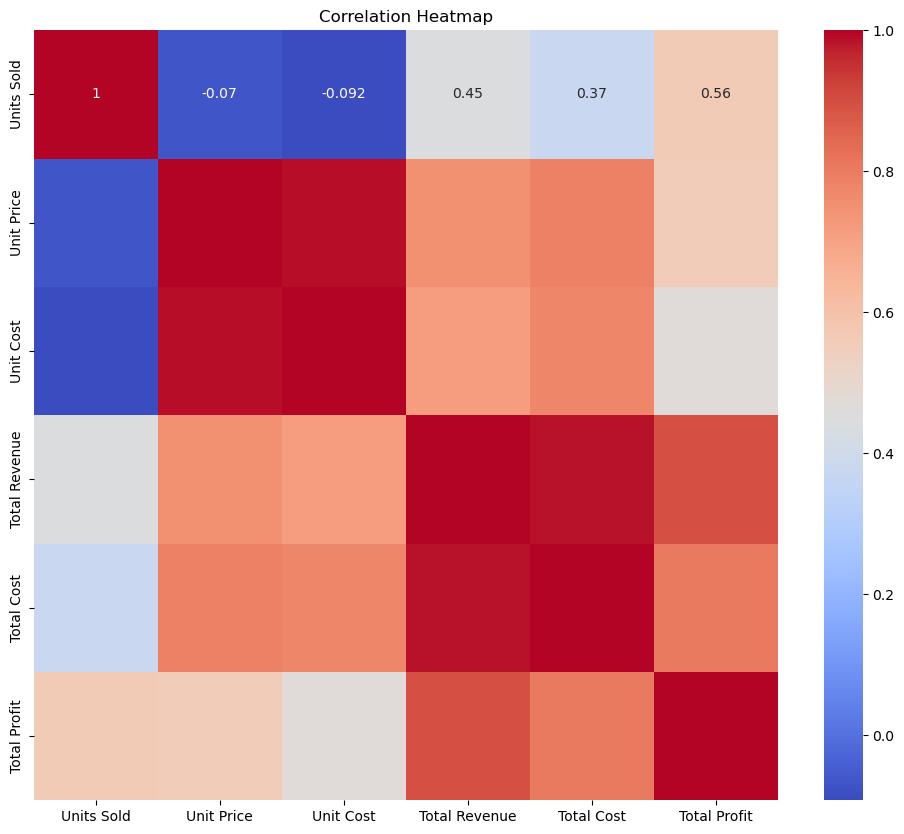

In [74]:
# Correlation Heatmap
plt.figure(figsize = (12, 10))
correlation_matrix = df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

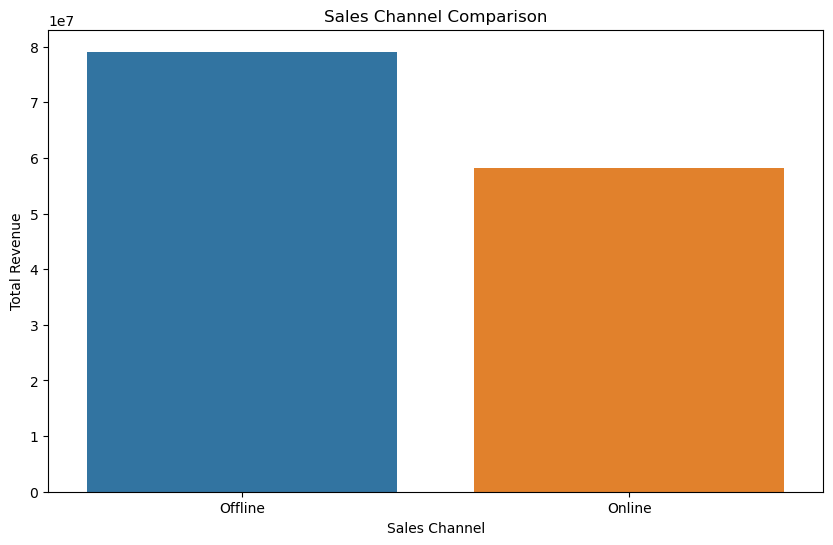

In [75]:
# Sales Channel Comparison
plt.figure(figsize = (10, 6))
channel_sales = df.groupby('Sales Channel')['Total Revenue'].sum().reset_index()
sns.barplot(x='Sales Channel', y='Total Revenue', data=channel_sales)
plt.title('Sales Channel Comparison')
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')
plt.show()

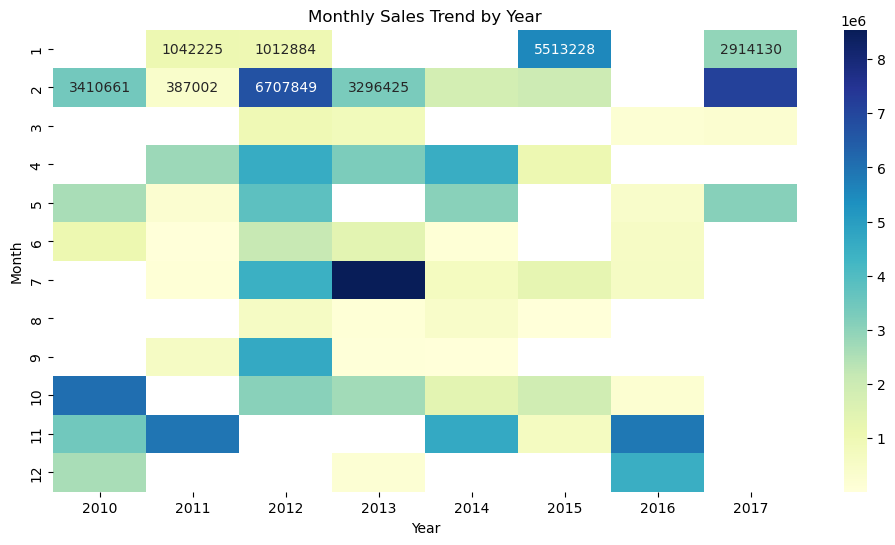

In [76]:
# Monthly Sales Trend by Year
plt.figure(figsize = (12, 6))
monthly_yearly_sales = df.groupby(['Year', 'Month'])['Total Revenue'].sum().reset_index()
pivot_data = monthly_yearly_sales.pivot(index='Month', columns='Year', values='Total Revenue')
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Monthly Sales Trend by Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

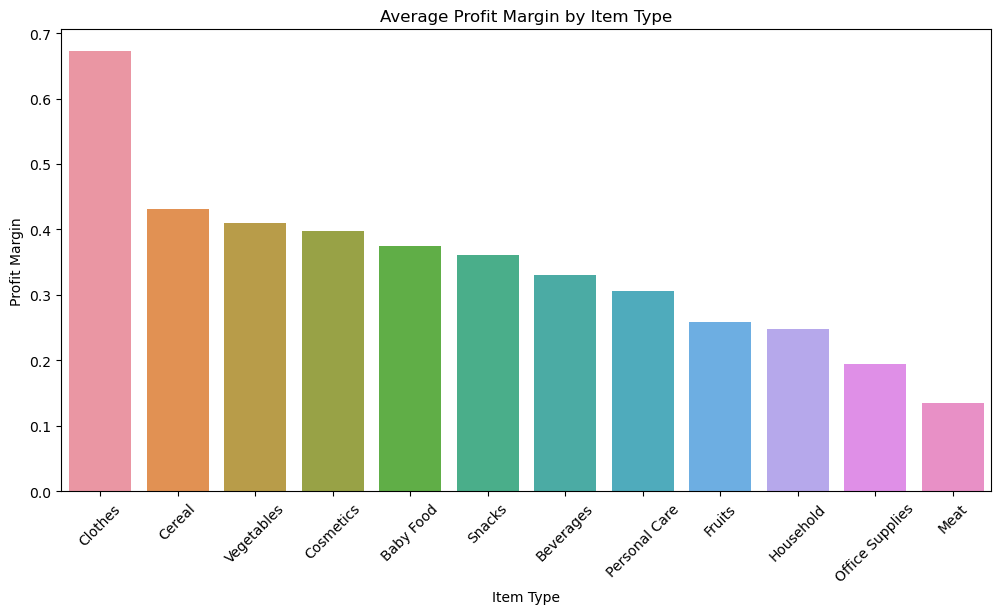

In [77]:
# Profit Margin by Item Type
df['Profit Margin'] = df['Total Profit'] / df['Total Revenue']
plt.figure(figsize = (12, 6))
profit_margin = df.groupby('Item Type')['Profit Margin'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='Item Type', y='Profit Margin', data=profit_margin)
plt.title('Average Profit Margin by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45)
plt.show()

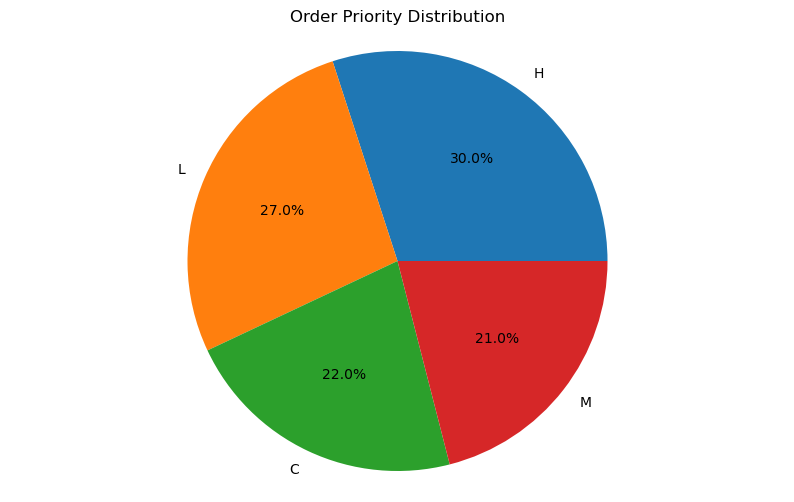

In [78]:
# Order Priority Distribution
plt.figure(figsize = (10, 6))
priority_count = df['Order Priority'].value_counts()
plt.pie(priority_count, labels=priority_count.index, autopct='%1.1f%%')
plt.title('Order Priority Distribution')
plt.axis('equal')
plt.show()

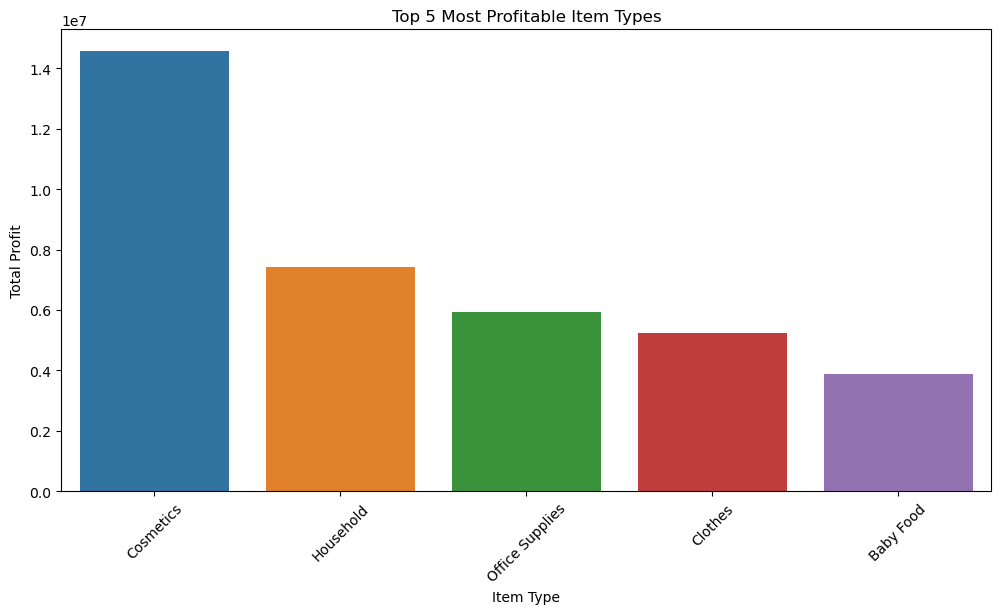

In [79]:
# Top 5 Most Profitable Item Types
plt.figure(figsize = (12, 6))
item_profit = df.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False).head(5)
sns.barplot(x=item_profit.index, y=item_profit.values)
plt.title('Top 5 Most Profitable Item Types')
plt.xlabel('Item Type')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

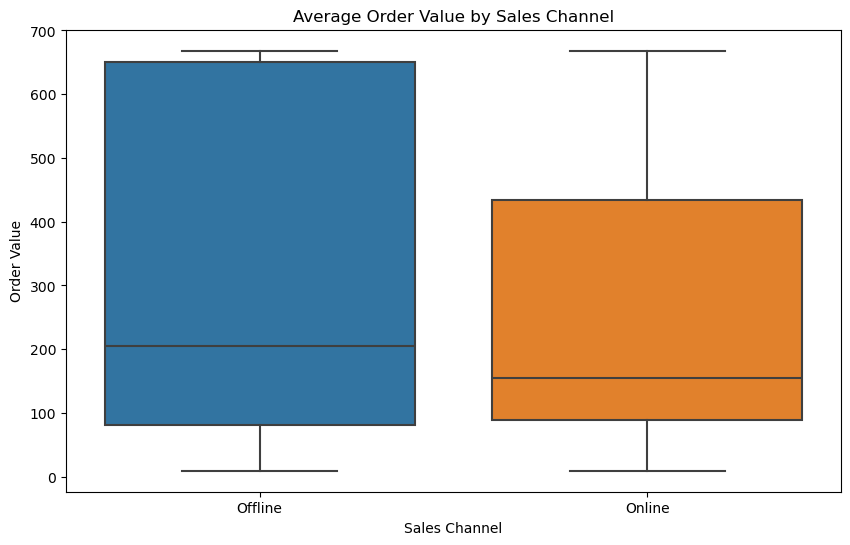

In [80]:
# Average Order Value by Sales Channel
df['Order Value'] = df['Total Revenue'] / df['Units Sold']
plt.figure(figsize = (10, 6))
sns.boxplot(x='Sales Channel', y='Order Value', data=df)
plt.title('Average Order Value by Sales Channel')
plt.ylabel('Order Value')
plt.show()

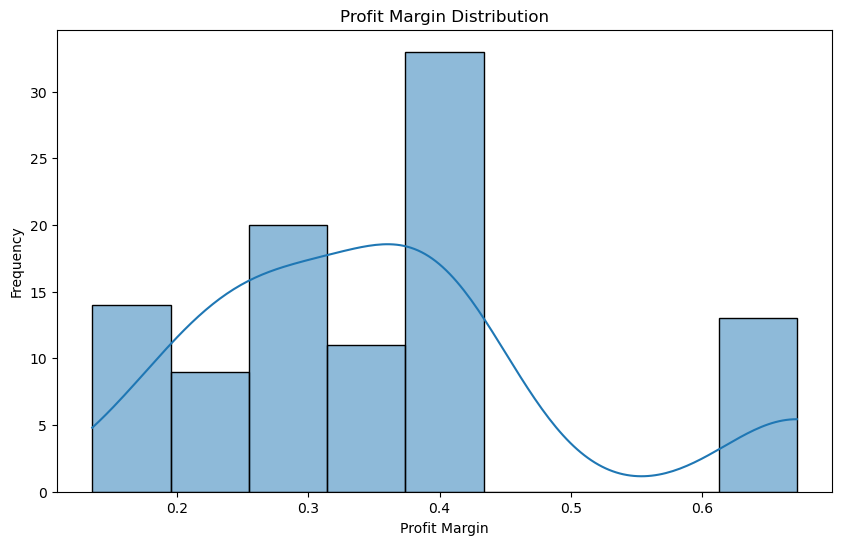

In [81]:
# Profit Margin Distribution
df['Profit Margin'] = df['Total Profit'] / df['Total Revenue']
plt.figure(figsize = (10, 6))
sns.histplot(df['Profit Margin'], kde=True)
plt.title('Profit Margin Distribution')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.show()

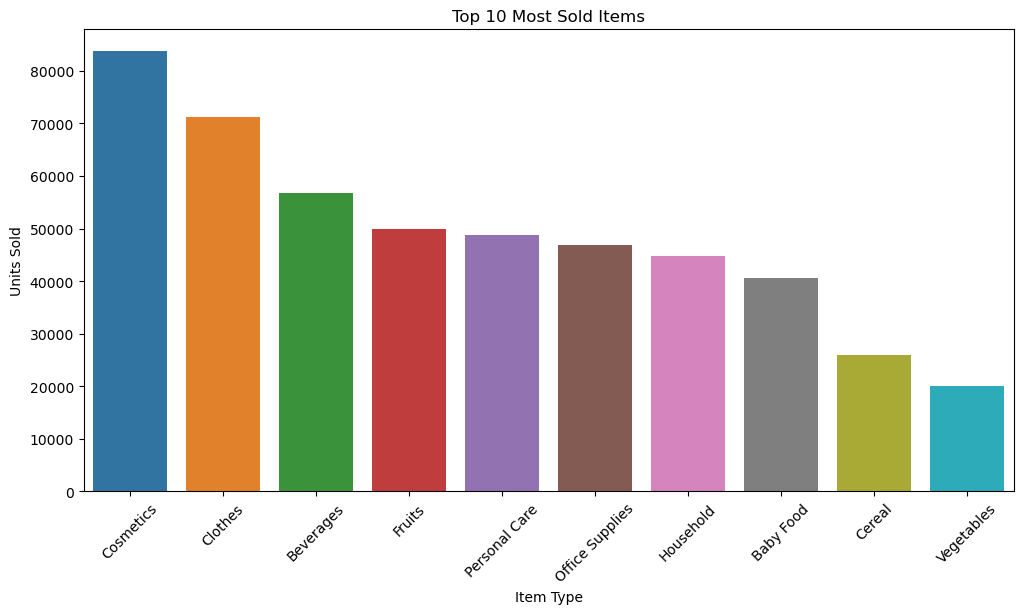

In [82]:
# Top 10 Most Sold Items
top_items = df.groupby('Item Type')['Units Sold'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize = (12, 6))
sns.barplot(x=top_items.index, y=top_items.values)
plt.title('Top 10 Most Sold Items')
plt.xlabel('Item Type')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

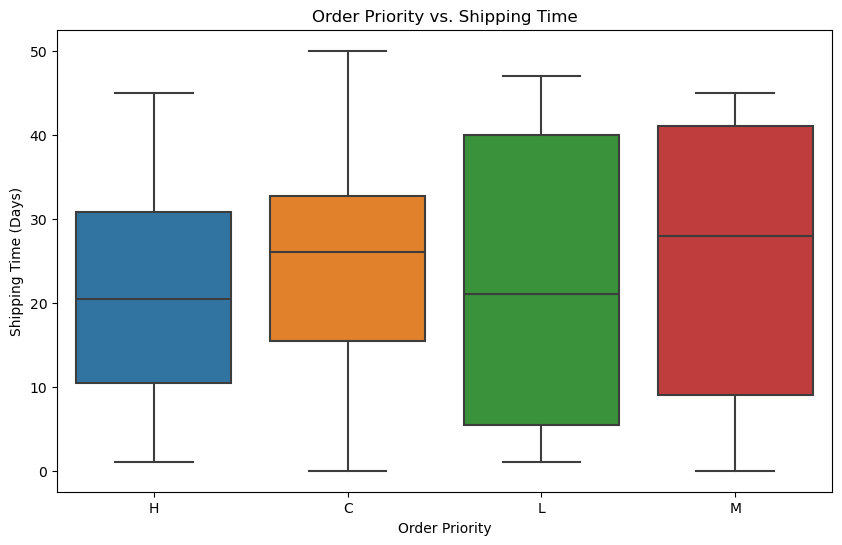

In [83]:
# Order Priority vs. Shipping Time
df['Shipping Time'] = (pd.to_datetime(df['Ship Date']) - pd.to_datetime(df['Order Date'])).dt.days
plt.figure(figsize = (10, 6))
sns.boxplot(x='Order Priority', y='Shipping Time', data=df)
plt.title('Order Priority vs. Shipping Time')
plt.ylabel('Shipping Time (Days)')
plt.show()

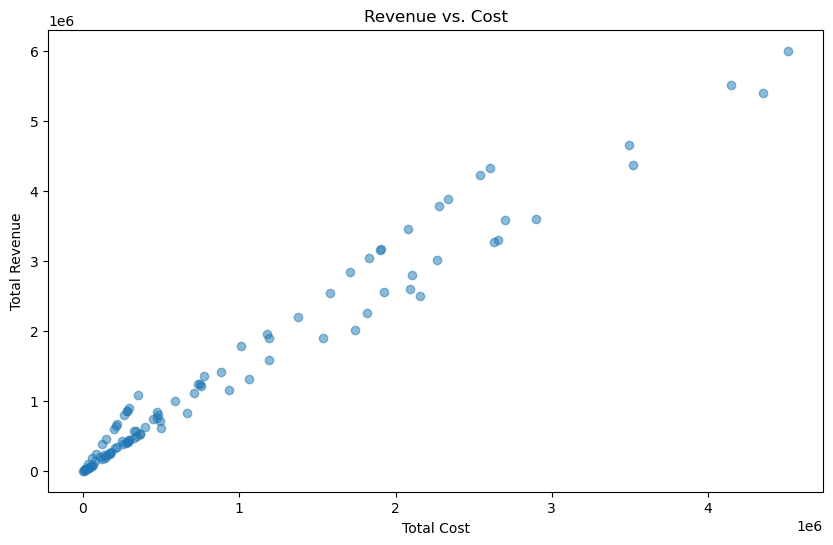

In [84]:
# Revenue vs. Cost Scatter Plot
plt.figure(figsize = (10, 6))
plt.scatter(df['Total Cost'], df['Total Revenue'], alpha=0.5)
plt.title('Revenue vs. Cost')
plt.xlabel('Total Cost')
plt.ylabel('Total Revenue')
plt.show()

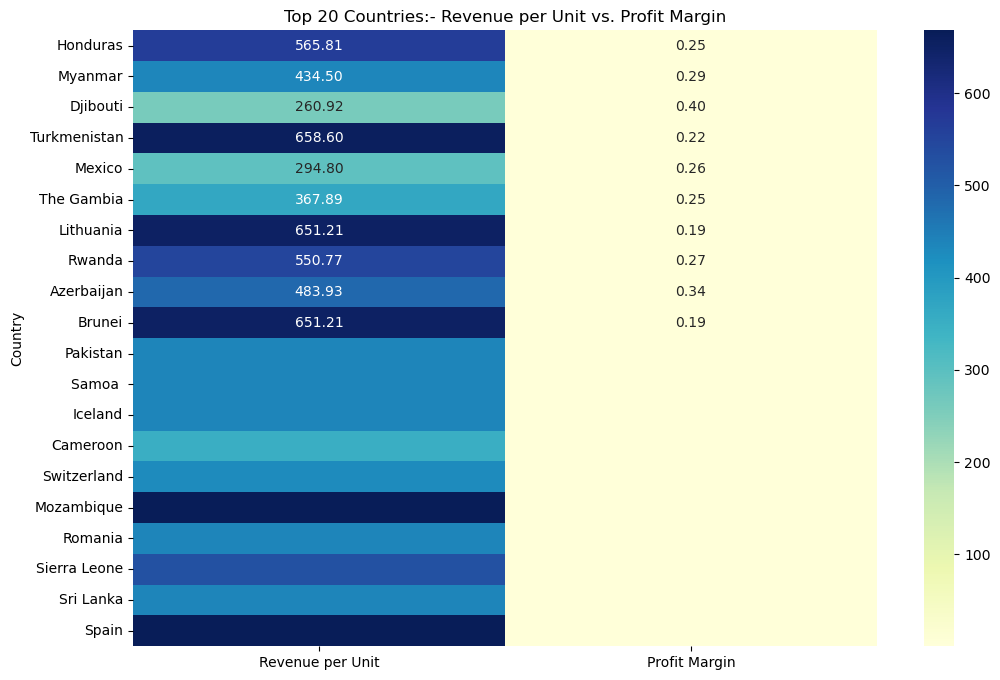

In [85]:
# Country Performance Heatmap
country_metrics = df.groupby('Country').agg({
    'Total Revenue':'sum',
    'Total Profit':'sum',
    'Units Sold':'sum'
}).reset_index()

country_metrics['Revenue per Unit'] = country_metrics['Total Revenue'] / country_metrics['Units Sold']
country_metrics['Profit Margin'] = country_metrics['Total Profit'] / country_metrics['Total Revenue']

top_20_countries = country_metrics.nlargest(20, 'Total Revenue')

plt.figure(figsize = (12, 8))
heatmap_data = top_20_countries.set_index('Country')[['Revenue per Unit', 'Profit Margin']]
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Top 20 Countries:- Revenue per Unit vs. Profit Margin')
plt.show()                                                    

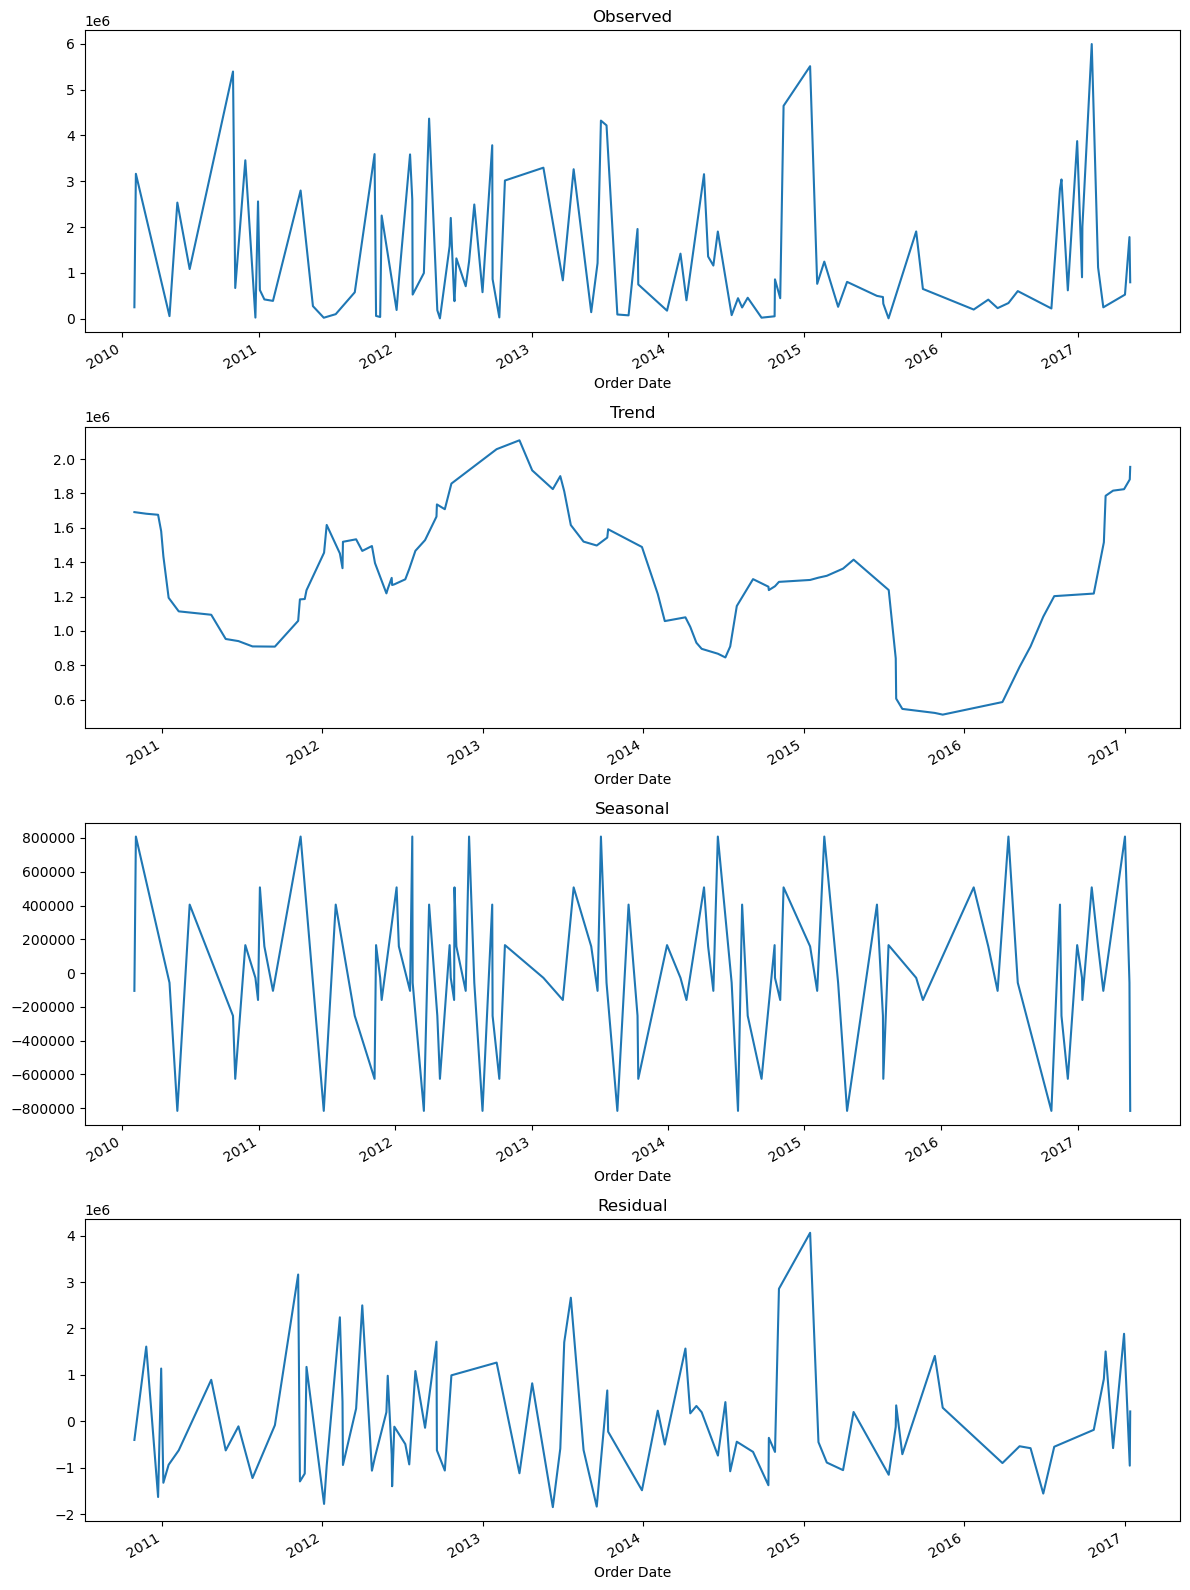

In [86]:
# Time Series Decomposition
monthly_sales = df.groupby('Order Date')['Total Revenue'].sum().reset_index().set_index('Order Date')
decomposition = seasonal_decompose(monthly_sales['Total Revenue'], model='additive', period=12)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (12, 16))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

## **Key Takeaways**
- This project has provided valuable insights into Amazon's sales patterns and overall performance. The consistent year-over-year growth reflects effective business strategies and an expanding market presence. The variety of top-performing countries emphasizes Amazon's global influence, with strong performances in both developed and emerging markets.

- In terms of products, the success of office supplies and household items points to a robust B2B and essential goods market. The high profit margins in cosmetics and baby food suggest opportunities for targeted marketing and expansion in these categories.

- The balance between online and offline sales channels showcases Amazon's omnichannel capabilities. However, the higher average order value in online sales indicates potential for further e-commerce strategy development.

- The variation in profit margins across different products and countries highlights opportunities for optimization. By concentrating on high-margin products and understanding regional preferences, Amazon can potentially enhance overall profitability.

- Lastly, the correlation between order priority and shipping times underscores the critical role of efficient logistics in ensuring customer satisfaction.

- This project has not only refined my data analysis skills but also provided deep insights into e-commerce trends and strategies. I'm eager to apply these learnings in future projects and contribute to data-driven decision-making in the business world.